In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import partipy as pt

N_SAMPLES = 50_000
N_ARCHETYPES = 8
N_DIMENSIONS = 20

X, A, Z = pt.simulate_archetypes(n_samples=N_SAMPLES,
                                 n_archetypes=N_ARCHETYPES,
                                 n_dimensions=N_DIMENSIONS,
                                 noise_std=0.0)

In [2]:
df_list = []
#for optim_alg in pt.OPTIM_ALGS:
for optim_alg in ['projected_gradients', 'frank_wolfe']:
    print(optim_alg)
    AA_object = pt.AA(n_archetypes=N_ARCHETYPES,
                      weight=None,
                      optim=optim_alg, 
                      init="random",
                      #init="furthest_sum",
                      max_iter=100).fit(X)
    df_list.append(pd.DataFrame({
        "rss": AA_object.RSS_trace.copy(),
        "iteration": np.arange(len(AA_object.RSS_trace)),
        "algorithm": optim_alg
    }))
plot_df = pd.concat(df_list, axis=0)
plot_df

projected_gradients
frank_wolfe


,rss,iteration,algorithm
0,18871.660156,0,projected_gradients
1,14633.822266,1,projected_gradients
2,10508.142578,2,projected_gradients
3,7483.609375,3,projected_gradients
4,6598.640625,4,projected_gradients
...,...,...,...
95,136.368851,95,frank_wolfe
96,136.351166,96,frank_wolfe
97,136.335220,97,frank_wolfe
98,136.320343,98,frank_wolfe


In [5]:
print(plot_df.query("algorithm=='frank_wolfe'").tail(1))
print(plot_df.query("algorithm=='projected_gradients'").tail(1))

          rss  iteration    algorithm
99  136.30928         99  frank_wolfe
           rss  iteration            algorithm
83  135.988312         83  projected_gradients


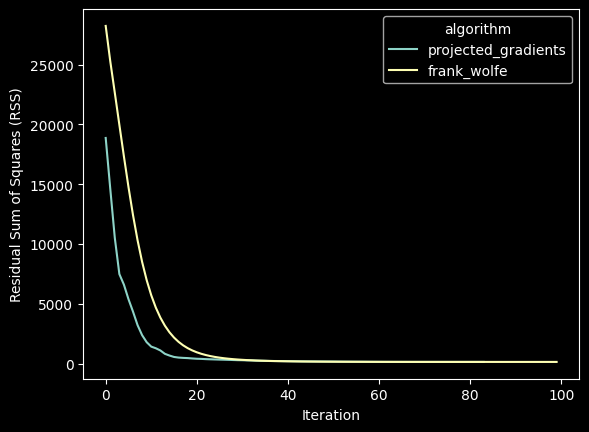

In [4]:
plt.style.use("dark_background")
sns.lineplot(data=plot_df, x="iteration", y="rss", hue="algorithm")
plt.xlabel("Iteration")
plt.ylabel("Residual Sum of Squares (RSS)")
plt.show()